In [3]:
import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb

### Single year estimates
([docs](https://api.census.gov/data/timeseries/idb/1year/variables.html)); SEX: 0 = Both; 1 = Male; 2 = Female

There is more detailed annual data for fewer variables. Notice that this is an excellent example of "tidy" data. Note that the data is pipe-separated "|" rather than comma-separated, so we need to change the default "sep" parameter. Also there are non-ASCII characters that aren't encoded as UTF8, it looks like "latin1" works.

In [4]:
# Load data
singleyear_df = pd.read_csv(
    'idbsingleyear.all',
    sep = '|',
    encoding = 'latin1'
)

# Report shape
print(singleyear_df.shape)

# Don't need these right now
singleyear_df.drop(columns = ['GENC','FIPS','AREA_KM2'],inplace=True)

# Replace obnoxious column name
singleyear_df.rename(columns={"#YR":"YEAR"},inplace=True)

# Replace obscure gender codes
singleyear_df.replace(
    {'SEX':
     {
        0:'Both',
        1:'Male',
        2:'Female'
     }
    },
    inplace = True
)

# Inspect
singleyear_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'idbsingleyear.all'

How many unique countries represented?

In [72]:
len(singleyear_df['NAME'].unique())

227

What is the min and max "AGE"?

In [73]:
singleyear_df['AGE'].min(), singleyear_df['AGE'].max()

(0, 100)

### Exercise 01: United States estimates

Filter to the United States and count the number of observations per "YEAR".

In [95]:
singleyear_us_df = singleyear_df[singleyear_df['NAME'] == "United States"]
singleyear_us_df['YEAR'].value_counts()

1980    303
2021    303
2039    303
2038    303
2037    303
       ... 
2006    303
2005    303
2004    303
2003    303
2060    303
Name: YEAR, Length: 81, dtype: int64

### Exercise 02: Pivot and slice the data
Pivot the data so YEAR and SEX are indices, AGE are columns, and POP are values.

In [96]:
singleyear_us_pivot = singleyear_us_df.pivot(
    index = ['YEAR','SEX'],
    columns = ['AGE'],
    values = ['POP']
).loc[:,'POP']

singleyear_us_pivot.head()

AGE              0        1        2        3        4        5        6    \
YEAR SEX                                                                     
1980 Both    3559857  3315535  3210169  3238099  3127524  3179868  3110507   
     Female  1739898  1618532  1569137  1581299  1528103  1552659  1519508   
     Male    1819959  1697003  1641032  1656800  1599421  1627209  1590999   
1981 Both    3607440  3436005  3314474  3260929  3273871  3128726  3185857   
     Female  1761743  1678106  1621040  1593945  1597794  1529390  1554826   

AGE              7        8        9        10       11       12       13   \
YEAR SEX                                                                     
1980 Both    3247691  3328772  3735515  3729085  3604713  3526994  3626046   
     Female  1587554  1626464  1824754  1820479  1764490  1726215  1777842   
     Male    1660137  1702308  1910761  1908606  1840223  1800779  1848204   
1981 Both    3165379  3140834  3439325  3807110  3690985  3598921  3553599   
     Female  1545290  1534256  1681894  1856121  1803781  1761785  1739800   

AGE              14       15       16       17       18       19       20   \
YEAR SEX                                                                     
1980 Both    3749497  3998828  4170006  4224747  4229835  4487524  4372101   
     Female  1834097  1960229  2039573  2063104  2087663  2230806  2178872   
     Male    1915400  2038599  2130433  2161643  2142172  2256718  2193229   
1981 Both    3649792  3783568  4000951  4173839  4171004  4411195  4460084   
     Female  1787260  1852070  1961068  2034707  2056322  2191701  2219444   

AGE              21       22       23       24       25       26       27   \
YEAR SEX                                                                     
1980 Both    4297074  4275458  4272306  4168766  4132980  4019418  3951351   
     Female  2145940  2133337  2138494  2086718  2070704  2018570  1988156   
     Male    2151134  2142121  2133812  2082048  2062276  2000848  1963195   
1981 Both    4299497  4276765  4290326  4336172  4202025  4115191  4065123   
     Female  2142473  2134033  2143999  2165000  2103958  2061325  2042784   

AGE              28       29       30       31       32       33       34   \
YEAR SEX                                                                     
1980 Both    3700573  3881644  3719295  3634043  3635579  3858613  2895176   
     Female  1862717  1953245  1874807  1839125  1838861  1953379  1465039   
     Male    1837856  1928399  1844488  1794918  1796718  1905234  1430137   
1981 Both    3800948  3985769  3860004  3639953  3660642  3595650  3975216   
     Female  1912158  1999462  1945556  1838490  1851858  1821954  2004801   

AGE              35       36       37       38       39       40       41   \
YEAR SEX                                                                     
1980 Both    2902454  2886316  3056102  2637757  2594105  2488764  2370894   
     Female  1472083  1468467  1554927  1344325  1319244  1268985  1208674   
     Male    1430371  1417849  1501175  1293432  1274861  1219779  1162220   
1981 Both    2860944  2863290  2899617  2976210  2766048  2599132  2397799   
     Female  1451285  1456532  1477474  1514254  1405094  1325446  1222205   

AGE              42       43       44       45       46       47       48   \
YEAR SEX                                                                     
1980 Both    2348217  2262250  2258372  2208880  2177433  2209363  2147214   
     Female  1197494  1157766  1156447  1130705  1118105  1137577  1103280   
     Male    1150723  1104484  1101925  1078175  1059328  1071786  1043934   
1981 Both    2382808  2365590  2282952  2216428  2248338  2202038  2080426   
     Female  1214355  1209703  1166539  1135375  1153164  1130318  1067150   

AGE              49   ...      51       52       53       54       55   \
YEAR SEX              ...                                                
1980 Both    2305150  .

Get the estimates and forecasts of number of 18-year-old men and women. (Hint: Use the `idx` ([docs](https://pandas.pydata.org/docs/reference/api/pandas.IndexSlice.html)) index slicer to access MultiIndex levels)

In [105]:
us_18 = singleyear_us_pivot.loc[idx[:,['Male','Female']],18].sort_index()
us_18.head()

YEAR  SEX   
1980  Female    2087663
      Male      2142172
1981  Female    2056322
      Male      2114682
1982  Female    2028471
Name: 18, dtype: int64

Unstack and plot the population estimates.

<AxesSubplot:xlabel='YEAR'>

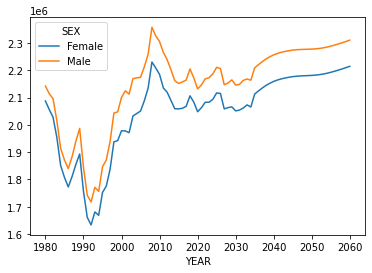

In [118]:
us_18_unstack_df = us_18.unstack()
us_18_unstack_df.plot.line()

### Exercise 03: Birth rate for a country in conflict

Filter the `singleyear_df` data to a single country, age, and sex.

In [126]:
c0 = singleyear_df['NAME'] == 'Syria'
c1 = singleyear_df['AGE'] == 0
c2 = singleyear_df['SEX'] == 'Both'
syria_df = singleyear_df[c0 & c1 & c2]
syria_df.head()

,YEAR,SEX,POP,NAME,AGE
6704784,2004,Both,529318,Syria,0
6704885,2005,Both,533737,Syria,0
6704986,2006,Both,559667,Syria,0
6705087,2007,Both,585958,Syria,0
6705188,2008,Both,593198,Syria,0


Plot the filtered data. Add a `axvline` for a year when the conflict started.

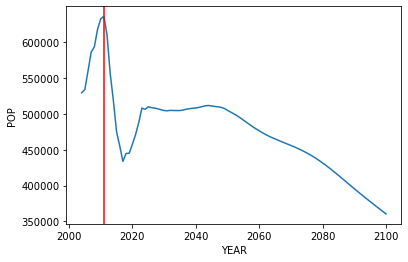

In [129]:
ax = sb.lineplot(data=syria_df,x='YEAR',y='POP')
ax.axvline(2011,c='r')

### Exercise 04: Visualize the sex ratio in 2020

Filter the data to exclude the "Both" category, only a single country, and only a single year.

In [212]:
c0 = singleyear_df['SEX'] != 'Both'
c1 = singleyear_df['NAME'] == 'Egypt'
c2 = singleyear_df['YEAR'] == 2020

country_df = singleyear_df.copy()[c0 & c1 & c2]

Pivot the data so the "AGE" is an index, columns are "SEX", and the values are "POP".

In [213]:
country_pivot_df = country_df.pivot(index='AGE',columns='SEX',values='POP').reset_index()

country_pivot_df.head()

SEX,AGE,Female,Male
0,0,1194103,1267894
1,1,1240086,1316613
2,2,1286482,1365984
3,3,1335495,1417954
4,4,1353654,1437148


Divide "Female" by "Male" and preserve as "FM ratio".

In [214]:
country_pivot_df['FM ratio'] = country_pivot_df['Female'] / country_pivot_df['Male']

Make a line plot with "FM ratio" as the y-axis and "AGE" as the x-axis. Add an `axhline` at 1.

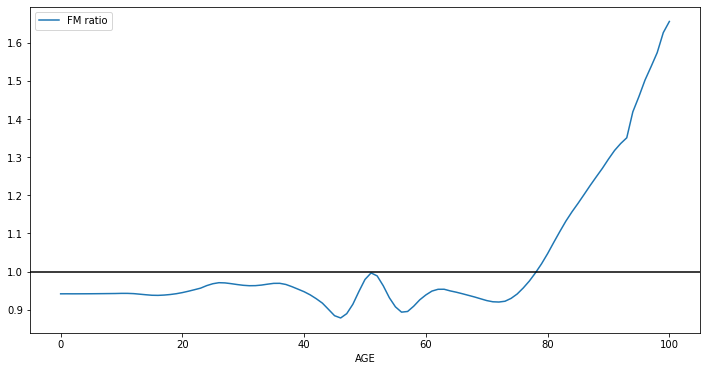

In [215]:
f,ax = plt.subplots(figsize=(12,6))
country_pivot_df.plot(x='AGE',y='FM ratio',ax=ax)
ax.axhline(1,color='k')

### Exercise 05: Make a population pyramid (Intermediate)
A [population pyramid](https://en.wikipedia.org/wiki/Population_pyramid) is a common data visualization within sociology and demography to represent the distribution of ages by gender.

Cast "AGE" to a `str` type to make it categorical.

In [200]:
country_pivot_df['AGE'] = country_pivot_df['AGE'].astype(str)

Make the values for "Male" negative so they go in the opposite direction as "Female".

In [198]:
country_pivot_df['Male'] = -country_pivot_df['Male']
country_pivot_df.head()

SEX,AGE,Female,Male
0,0,203624,-216326
1,1,209718,-223013
2,2,216053,-229919
3,3,221749,-235941
4,4,227543,-242068


Make two `barplot`s with the "AGE" on the y-axis and the "Male" and "Female" on the x-axis.

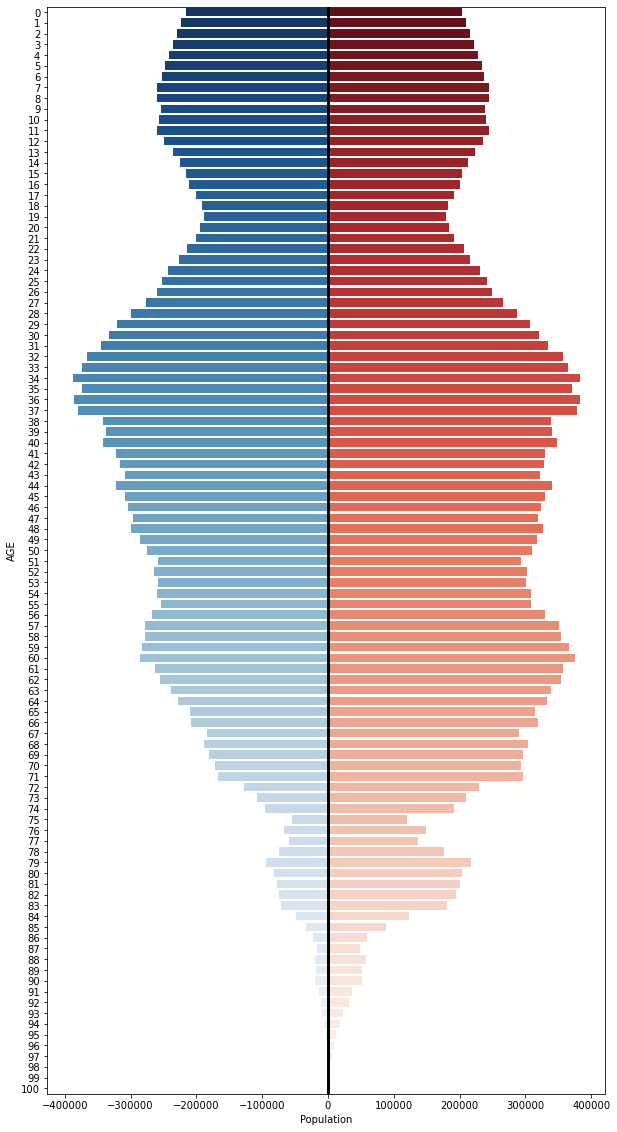

In [199]:
f,ax = plt.subplots(figsize=(10,20))
sb.barplot(x='Female',y='AGE',data=country_pivot_df,ax=ax,palette='Reds_r')
sb.barplot(x='Male',y='AGE',data=country_pivot_df,ax=ax,palette='Blues_r')
ax.set_xlabel('Population')
ax.axvline(0,color='k',lw=3)

### 5-year estimates
([docs](https://api.census.gov/data/timeseries/idb/5year/variables.html))

This is an excellent example of "wide" data and is used by Wickham as an example of un-tidy data because there are multiple variables in the column names (sex, age, and variable). We could (should?) clean this up... at some point but let's keep the data wide for now.

In [11]:
fiveyear_df = pd.read_csv(
    'idb5yr.all',
    sep = '|',
    encoding = 'latin1'
)

fiveyear_df.head()

,#YR,TFR,SRB,RNI,POP95_99,POP90_94,POP85_89,POP80_84,POP75_79,POP70_74,POP65_69,POP60_64,POP5_9,POP55_59,POP50_54,POP45_49,POP40_44,POP35_39,POP30_34,POP25_29,POP20_24,POP15_19,POP10_14,POP100_,POP0_4,POP,NMR,NAME,MR1_4,MR0_4,MPOP95_99,MPOP90_94,MPOP85_89,MPOP80_84,MPOP75_79,MPOP70_74,MPOP65_69,MPOP60_64,MPOP5_9,MPOP55_59,MPOP50_54,MPOP45_49,MPOP40_44,MPOP35_39,MPOP30_34,MPOP25_29,MPOP20_24,MPOP15_19,MPOP10_14,MPOP100_,MPOP0_4,MPOP,MMR1_4,MMR0_4,IMR_M,IMR_F,IMR,GRR,GR,FPOP95_99,FPOP90_94,FPOP85_89,FPOP80_84,FPOP75_79,FPOP70_74,FPOP65_69,FPOP60_64,FPOP5_9,FPOP55_59,FPOP50_54,FPOP45_49,FPOP40_44,FPOP35_39,FPOP30_34,FPOP25_29,FPOP20_24,FPOP15_19,FPOP10_14,FPOP100_,FPOP0_4,FPOP,FMR1_4,FMR0_4,GENC,FIPS,E0_M,E0_F,E0,CDR,CBR,ASFR45_49,ASFR40_44,ASFR35_39,ASFR30_34,ASFR25_29,ASFR20_24,ASFR15_19,AREA_KM2,POP_DENS
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6176,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,13.2
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,13.5
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,12.5
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5591,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,11.9
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5503,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,11.8


In [41]:
fiveyear_df['NAME'].value_counts()

Andorra          151
Romania          151
Malaysia         151
Mozambique       151
Namibia          151
                ... 
Guam             151
Guinea-Bissau    151
Guyana           151
Zimbabwe         151
United States    111
Name: NAME, Length: 227, dtype: int64

## Appendix

Here's our anatomy of a matplotlib figure for reference.

![Anatomy of a matplotlib figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

### Cleaning 5-year estimates

In [18]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

import re

In [ ]:
age_bucket_order = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39',
                    '40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79',
                    '80-84','85-89','90-94','95-99','100-']

In [58]:
fiveyear_df = pd.read_csv('idb5yr.all',sep='|',encoding='latin1')
fiveyear_df.head()

,#YR,TFR,SRB,RNI,POP95_99,POP90_94,POP85_89,POP80_84,POP75_79,POP70_74,POP65_69,POP60_64,POP5_9,POP55_59,POP50_54,POP45_49,POP40_44,POP35_39,POP30_34,POP25_29,POP20_24,POP15_19,POP10_14,POP100_,POP0_4,POP,NMR,NAME,MR1_4,MR0_4,MPOP95_99,MPOP90_94,MPOP85_89,MPOP80_84,MPOP75_79,MPOP70_74,MPOP65_69,MPOP60_64,MPOP5_9,MPOP55_59,MPOP50_54,MPOP45_49,MPOP40_44,MPOP35_39,MPOP30_34,MPOP25_29,MPOP20_24,MPOP15_19,MPOP10_14,MPOP100_,MPOP0_4,MPOP,MMR1_4,MMR0_4,IMR_M,IMR_F,IMR,GRR,GR,FPOP95_99,FPOP90_94,FPOP85_89,FPOP80_84,FPOP75_79,FPOP70_74,FPOP65_69,FPOP60_64,FPOP5_9,FPOP55_59,FPOP50_54,FPOP45_49,FPOP40_44,FPOP35_39,FPOP30_34,FPOP25_29,FPOP20_24,FPOP15_19,FPOP10_14,FPOP100_,FPOP0_4,FPOP,FMR1_4,FMR0_4,GENC,FIPS,E0_M,E0_F,E0,CDR,CBR,ASFR45_49,ASFR40_44,ASFR35_39,ASFR30_34,ASFR25_29,ASFR20_24,ASFR15_19,AREA_KM2,POP_DENS
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6176,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,13.2
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,13.5
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,12.5
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5591,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,11.9
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5503,NaN,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AD,AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468,11.8


Let's filter to population estimates by 5-year age bucket.

In [59]:
pop_cols = [col for col in fiveyear_df.columns if 'POP' in col and "_" in col and "DENS" not in col]
pop_cols

['POP95_99',
 'POP90_94',
 'POP85_89',
 'POP80_84',
 'POP75_79',
 'POP70_74',
 'POP65_69',
 'POP60_64',
 'POP5_9',
 'POP55_59',
 'POP50_54',
 'POP45_49',
 'POP40_44',
 'POP35_39',
 'POP30_34',
 'POP25_29',
 'POP20_24',
 'POP15_19',
 'POP10_14',
 'POP100_',
 'POP0_4',
 'MPOP95_99',
 'MPOP90_94',
 'MPOP85_89',
 'MPOP80_84',
 'MPOP75_79',
 'MPOP70_74',
 'MPOP65_69',
 'MPOP60_64',
 'MPOP5_9',
 'MPOP55_59',
 'MPOP50_54',
 'MPOP45_49',
 'MPOP40_44',
 'MPOP35_39',
 'MPOP30_34',
 'MPOP25_29',
 'MPOP20_24',
 'MPOP15_19',
 'MPOP10_14',
 'MPOP100_',
 'MPOP0_4',
 'FPOP95_99',
 'FPOP90_94',
 'FPOP85_89',
 'FPOP80_84',
 'FPOP75_79',
 'FPOP70_74',
 'FPOP65_69',
 'FPOP60_64',
 'FPOP5_9',
 'FPOP55_59',
 'FPOP50_54',
 'FPOP45_49',
 'FPOP40_44',
 'FPOP35_39',
 'FPOP30_34',
 'FPOP25_29',
 'FPOP20_24',
 'FPOP15_19',
 'FPOP10_14',
 'FPOP100_',
 'FPOP0_4']

Filter to `pop_cols` and start tidying process by moving id variables to index.

In [60]:
fiveyear_pop_df = fiveyear_df.set_index(['#YR','FIPS','NAME','GENC']).loc[:,pop_cols]
fiveyear_pop_df.head()

,,,,POP95_99,POP90_94,POP85_89,POP80_84,POP75_79,POP70_74,POP65_69,POP60_64,POP5_9,POP55_59,POP50_54,POP45_49,POP40_44,POP35_39,POP30_34,POP25_29,POP20_24,POP15_19,POP10_14,POP100_,POP0_4,MPOP95_99,MPOP90_94,MPOP85_89,MPOP80_84,MPOP75_79,MPOP70_74,MPOP65_69,MPOP60_64,MPOP5_9,MPOP55_59,MPOP50_54,MPOP45_49,MPOP40_44,MPOP35_39,MPOP30_34,MPOP25_29,MPOP20_24,MPOP15_19,MPOP10_14,MPOP100_,MPOP0_4,FPOP95_99,FPOP90_94,FPOP85_89,FPOP80_84,FPOP75_79,FPOP70_74,FPOP65_69,FPOP60_64,FPOP5_9,FPOP55_59,FPOP50_54,FPOP45_49,FPOP40_44,FPOP35_39,FPOP30_34,FPOP25_29,FPOP20_24,FPOP15_19,FPOP10_14,FPOP100_,FPOP0_4
#YR,FIPS,NAME,GENC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950,AN,Andorra,AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,AN,Andorra,AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,AN,Andorra,AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,AN,Andorra,AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,AN,Andorra,AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Stack and rename columns.

In [61]:
fiveyear_pop_stack_df = fiveyear_pop_df.stack().reset_index()
fiveyear_pop_stack_df.columns = ['year','fips','name','genc','variable','population']
fiveyear_pop_stack_df.head()

,year,fips,name,genc,variable,population
0,1990,AN,Andorra,AD,POP95_99,27.0
1,1990,AN,Andorra,AD,POP90_94,67.0
2,1990,AN,Andorra,AD,POP85_89,292.0
3,1990,AN,Andorra,AD,POP80_84,573.0
4,1990,AN,Andorra,AD,POP75_79,981.0


Create new columns with empty data.

In [62]:
fiveyear_pop_stack_df['gender'] = (fiveyear_pop_stack_df['variable']
                                   .str.findall(r'(\w)POP')
                                   .str.get(0)
                                  )

fiveyear_pop_stack_df['gender'].fillna('B',inplace=True)

fiveyear_pop_stack_df['age'] = (fiveyear_pop_stack_df['variable']
                                .str.findall(r'POP([\d\_]+)')
                                .str.get(0)
                                .str.replace('_','-')
                               )

fiveyear_pop_stack_df.drop(columns=['fips','genc','variable'],inplace=True)

fiveyear_pop_stack_df['age'] = pd.Categorical(
    fiveyear_pop_stack_df['age'],
    categories=age_bucket_order,
    ordered=True
)

In [63]:
fiveyear_pop_stack_df.head()

,year,name,population,gender,age
0,1990,Andorra,27.0,B,95-99
1,1990,Andorra,67.0,B,90-94
2,1990,Andorra,292.0,B,85-89
3,1990,Andorra,573.0,B,80-84
4,1990,Andorra,981.0,B,75-79
